In [1]:
import kagglehub

path = kagglehub.dataset_download("zubairamuti/shopping-behaviours-dataset")

print("Path to dataset files:", path)
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

csv_path = os.path.join(path, os.listdir(path)[0])
df = pd.read_csv(csv_path)


sns.set_theme(style='ticks')

df.head()

c:\Users\RAZER\.conda\envs\df_projects\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\RAZER\.cache\kagglehub\datasets\zubairamuti\shopping-behaviours-dataset\versions\1


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


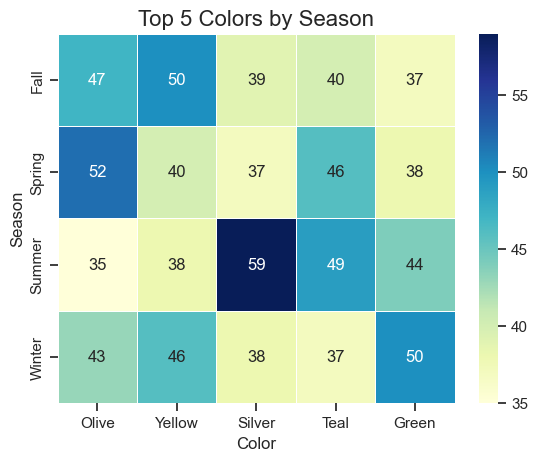

<Figure size 1000x600 with 0 Axes>

In [2]:
df_pivoted_color = df.pivot_table(columns='Color' ,index='Season',aggfunc='size')
df_pivoted_color.loc['total'] = df_pivoted_color.sum()
df_pivoted_color = df_pivoted_color[df_pivoted_color.loc['total'].sort_values(ascending=False).index]
df_pivoted_color.drop('total',inplace=True)
df_pivoted_color=df_pivoted_color.iloc[:,:5]
sns.heatmap(df_pivoted_color, annot=True, fmt='d', cmap='YlGnBu',linewidths=0.5)
plt.title('Top 5 Colors by Season',fontsize=16)
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show()



C:\Users\RAZER\AppData\Local\Temp\ipykernel_3592\2228725772.py:7: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_pivoted_category,markers='o', dashes=False)


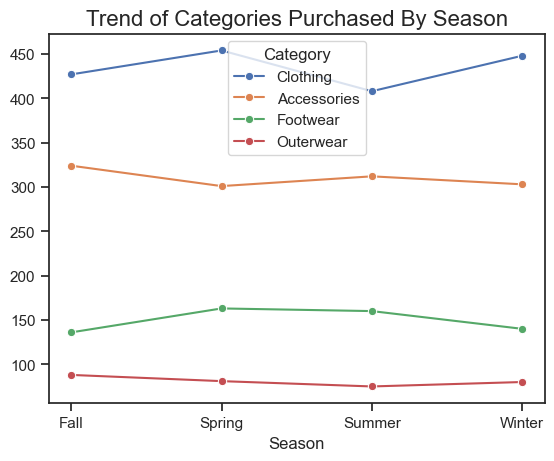

<Figure size 1000x600 with 0 Axes>

In [3]:

df_pivoted_category= df.pivot_table(columns='Category' ,index='Season',aggfunc='size')
df_pivoted_category.loc['total'] = df_pivoted_category.sum()
df_pivoted_category = df_pivoted_category[df_pivoted_category.loc['total'].sort_values(ascending=False).index]
df_pivoted_category.drop('total',inplace=True)
df_pivoted_category=df_pivoted_category.iloc[:,:5]
#sns.heatmap(df_pivoted_category, annot=True, fmt='d', cmap='YlGnBu',linewidths=0.5)
sns.lineplot(data=df_pivoted_category,markers='o', dashes=False)
plt.title('Trend of Categories Purchased By Season',fontsize=16)
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show()


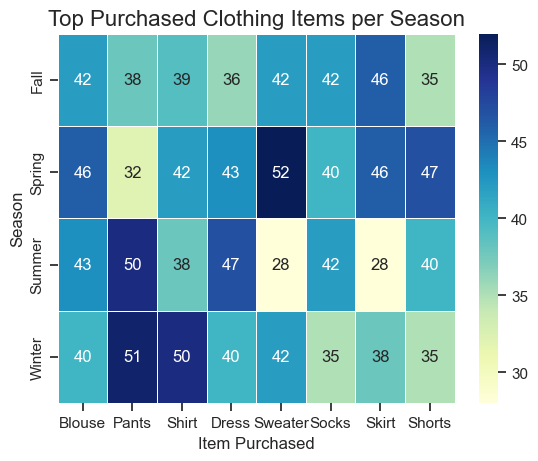

<Figure size 1000x600 with 0 Axes>

In [4]:
df_clothes = df[df['Category']=='Clothing']

df_season_item_pivot= df_clothes.pivot_table(columns='Item Purchased' ,index='Season',aggfunc='size')
df_season_item_pivot.loc['total'] = df_season_item_pivot.sum()
df_season_item_pivot = df_season_item_pivot[df_season_item_pivot.loc['total'].sort_values(ascending=False).index]
df_season_item_pivot.drop('total',inplace=True)
df_season_item_pivot=df_season_item_pivot.iloc[:,:8]
sns.heatmap(df_season_item_pivot, annot=True, fmt='d', cmap='YlGnBu',linewidths=0.5)
plt.title('Top Purchased Clothing Items per Season',fontsize=16)
plt.figure(figsize=(10,6))


plt.show()